In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt

In [1]:
base_path = './data/reimplemented_2016_manual/'
datasets = ['ant', 'cassandra', 'commons', 'derby',
            'jmeter', 'lucene-solr', 'maven', 'tomcat']

In [70]:
n_rounds = 501
good = { i: 0 for i in range(1, n_rounds) }
bad = { i: 0 for i in range(1, n_rounds) }
total = { i: 0 for i in range(1, n_rounds) }

for dataset in datasets:
    # Load the data
    train_file = base_path + 'train/' + dataset + '_B_features.csv'
    test_file = base_path + 'test/' + dataset + '_C_features.csv'
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)

    # Merge
    df = pd.concat((train_df, test_df), join='inner')

    # Split into X, y
    X = df.drop('category', axis=1)
    X = X.select_dtypes(
        exclude=['object']).astype(np.float32)
    y = df['category']

    # Set y to floats
    y[y == 'close'] = 1.
    y[y == 'open'] = 0.
    y = np.array(y, dtype=np.float32)

    # Get class imbalance
    n = sum(y) / len(y)

    for j in range(1, n_rounds):
        # How many concentric boxes do we make, * the width of each box (0.03)
        #concentric_dist = 0.03 * (1 + np.floor(np.log2(1. / n)))
        concentric_dist = 0.03 * j

        # How many of the distances are less than this number?
        dist_matrix = pairwise_distances(X, metric='manhattan')
        row_idx, col_idx = np.where((dist_matrix <= concentric_dist) & (1e-3 < dist_matrix))

        for i in range(len(row_idx)):
            if y[row_idx[i]] == y[col_idx[i]]:
                good[j] += 1
            else:
                bad[j] += 1
        total[j] += len(y)

ratios = [good[i] / (good[i] + bad[i]) for i in range(1, n_rounds)]
reduction = [good[i] / total[i] for i in range(1, n_rounds)]
print(ratios, reduction)

<ipython-input-70-68438744de8a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'close'] = 1.
<ipython-input-70-68438744de8a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'open'] = 0.
<ipython-input-70-68438744de8a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'close'] = 1.
<ipython-input-70-68438744de8a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9911504424778761, 0.991304347826087, 0.9913793103448276, 0.9914529914529915, 0.9914529914529915, 0.9914529914529915, 0.9914529914529915, 0.9915254237288136, 0.9915966386554622, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9754098360655737, 0.9754098360655737, 0.9754098360655737, 0.9754098360655737, 0.9754098360655737, 0.9754098360655737, 0.9754098360655737, 0.968, 0.9609375, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9626865671641791, 0.9626865671641791, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9632352941176471, 0.9632352941176471, 0.9632352941176471, 0.9632352941176471, 0.9632352941176471, 0.9632352941176471, 0.9632352941176471, 0.9637681159420289, 0.9637681159420289, 0.9640287769784173, 0.9640287769784173, 0.9640287769784173, 0.9640287769

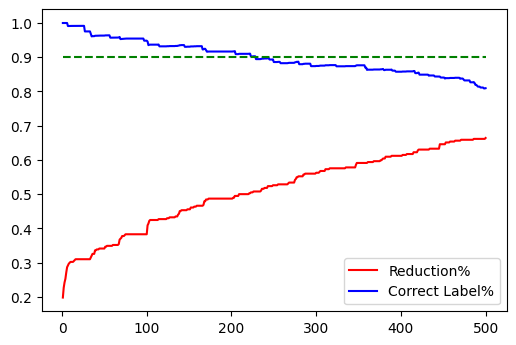

In [71]:
plt.figure(dpi=100, facecolor='white')
plt.plot(range(1, n_rounds), reduction, 'r-', label='Reduction%')
plt.plot(range(1, n_rounds), ratios, 'b-', label='Correct Label%');
plt.plot(range(1, n_rounds), [.9] * (n_rounds - 1), 'g--')
plt.legend();